### En este utilizaremos un Dataset con imagenes a color

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In [2]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [28]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [29]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [30]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [31]:
X_train_full.shape

(50000, 32, 32, 3)

In [32]:
model = models.Sequential()
# En Conv2D recomendado usar multiplos de 2
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
# A la segunda convolucion ya no hace falta ponerle el input_shape
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
# Aplanar la capa
model.add(layers.Flatten())
# Ahora meter alguna densa
model.add(layers.Dense(64,activation="relu"))
# Capa de salida
model.add(layers.Dense(10,activation="softmax"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [34]:
# Modelo adam, mas utilizado y recomendado
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",optimizer=adam ,metrics=["accuracy"])

In [35]:
epochs = 1000

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3782 - loss: 1.7216 - val_accuracy: 0.5908 - val_loss: 1.1755
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5925 - loss: 1.1535 - val_accuracy: 0.6292 - val_loss: 1.0523
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6543 - loss: 0.9970 - val_accuracy: 0.6364 - val_loss: 1.0431
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6905 - loss: 0.8953 - val_accuracy: 0.6764 - val_loss: 0.9454
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7112 - loss: 0.8320 - val_accuracy: 0.6874 - val_loss: 0.9034
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7300 - loss: 0.7764 - val_accuracy: 0.6920 - val_loss: 0.8819
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7516 - loss: 0.7144 - val_accuracy: 0.7014 - val_loss: 0.8834
Epoch 8/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7655 

<Axes: >

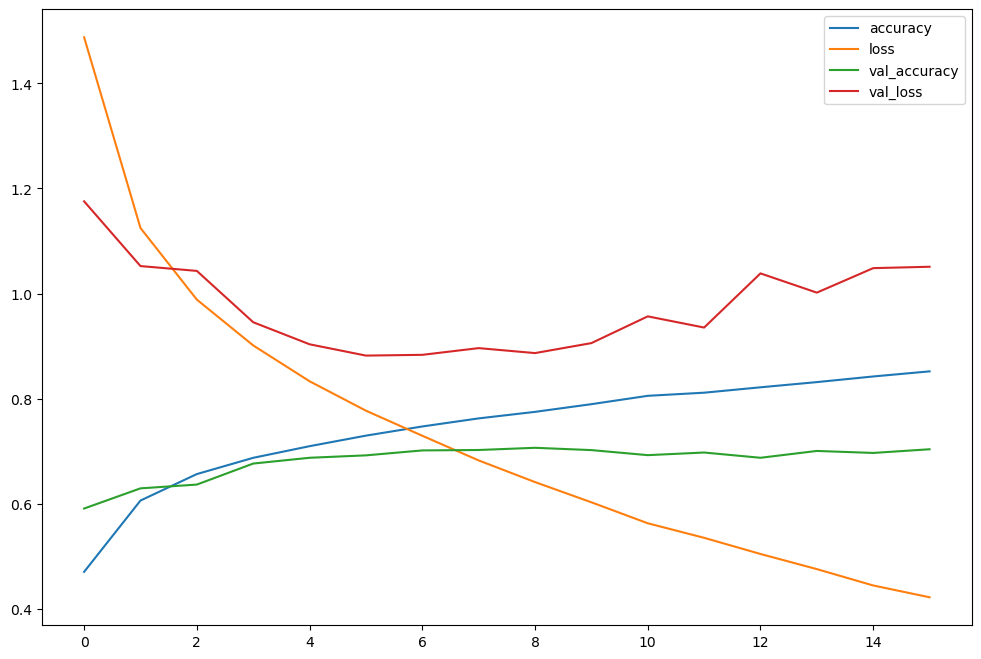

In [36]:
pd.DataFrame(history.history).plot(figsize=(12,8))

In [37]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6952 - loss: 0.8974


[0.902764081954956, 0.6909999847412109]

In [38]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


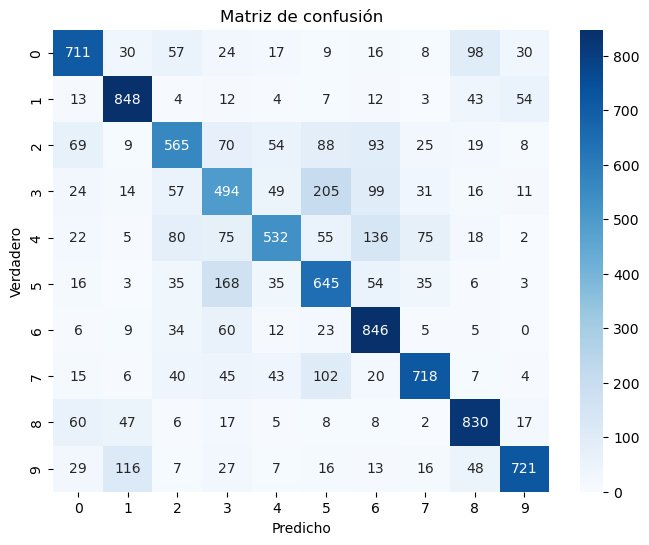

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()

In [40]:
from sklearn.metrics import classification_report

report = classification_report(y_test_true_labels, y_test_pred_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.7368    0.7110    0.7237      1000
           1     0.7801    0.8480    0.8126      1000
           2     0.6384    0.5650    0.5995      1000
           3     0.4980    0.4940    0.4960      1000
           4     0.7018    0.5320    0.6052      1000
           5     0.5570    0.6450    0.5978      1000
           6     0.6523    0.8460    0.7366      1000
           7     0.7821    0.7180    0.7487      1000
           8     0.7615    0.8300    0.7943      1000
           9     0.8482    0.7210    0.7795      1000

    accuracy                         0.6910     10000
   macro avg     0.6956    0.6910    0.6894     10000
weighted avg     0.6956    0.6910    0.6894     10000

